# 1. Data Processing

In [388]:
import numpy as np
import pandas as pd

In [389]:
path = './datasets/HKMO_Award_List/'

In [390]:
HKMO_Award_List_2024 = pd.read_csv(path + 'HKMO_Award_List_2024.csv', delimiter='	')
HKMO_Award_List_2024_schools = HKMO_Award_List_2024['就讀學校'].value_counts()

HKMO_Award_List_2023 = pd.read_csv(path + 'HKMO_Award_List_2023.csv', delimiter='	')
HKMO_Award_List_2023_schools = HKMO_Award_List_2023['就讀學校'].value_counts()

HKMO_Award_List_2022 = pd.read_csv(path + 'HKMO_Award_List_2022.csv', delimiter='	')
HKMO_Award_List_2022_schools = HKMO_Award_List_2022['學校編號'].value_counts()

HKMO_Award_List_2021 = pd.read_csv(path + 'HKMO_Award_List_2021.csv', delimiter='	')
HKMO_Award_List_2021_schools = HKMO_Award_List_2021['學校編號'].value_counts()

In [394]:
HKMO_Award_List = pd.concat([HKMO_Award_List_2024_schools, HKMO_Award_List_2023_schools, HKMO_Award_List_2022_schools,HKMO_Award_List_2021_schools], axis=1,ignore_index=True)
HKMO_Award_List.columns = ['2024','2023','2022','2021']
HKMO_Award_List.values[HKMO_Award_List.isna()] = 0
HKMO_Award_List.reset_index(inplace=True)
HKMO_Award_List.rename(columns={'index': 'School Code'}, inplace=True)

In [402]:
primary_school_code_and_list = pd.read_csv('./datasets/primary_school_code_and_list.csv')
primary_school_code_HKMO_Award = pd.merge(primary_school_code_and_list, HKMO_Award_List, on='School Code', how='inner')

primary_school_code_HKMO_Award['Total'] = primary_school_code_HKMO_Award[['2024', '2023', '2022', '2021']].sum(axis=1)
Total_HKMO_Awards_By_District = primary_school_code_HKMO_Award.groupby(['District', 'Sub_District'])['Total'].sum().reset_index()
Total_HKMO_Awards_By_District

District Sub_District  Total
0        九龍         九龍城區  325.0
1        九龍         油尖旺區  113.0
2        九龍         深水埗區  140.0
3        九龍          觀塘區   96.0
4        九龍         黃大仙區   51.0
5        新界          元朗區   87.0
6        新界           北區   73.0
7        新界          大埔區   52.0
8        新界          屯門區  109.0
9        新界          沙田區  137.0
10       新界          荃灣區   61.0
11       新界          葵青區   51.0
12       新界          西貢區   85.0
13       新界          離島區   24.0
14       港島          中西區   46.0
15       港島           南區  168.0
16       港島           東區  122.0
17       港島          灣仔區  101.0

In [395]:
path_en = './datasets/PSP/psp_2024_en.csv'
path_sc = './datasets/PSP/psp_2024_tc.csv'

In [425]:
schools_datasets_en = pd.read_csv(path_en, delimiter=',')
schools_datasets_sc = pd.read_csv(path_sc, delimiter=',')
schools_datasets_en_colunms = schools_datasets_en.columns
schools_datasets_sc.columns = schools_datasets_en_colunms

primary_school_code_HKMO_Award.columns = primary_school_code_HKMO_Award.columns.str.lower()
primary_school_code_HKMO_Award.rename(columns={'school name': 'school_name'}, inplace=True)
primary_school_code_HKMO_Award.head(1)

schools_datasets = schools_datasets_sc[['district','school_name','school_type_1','title_supervisor','student_gender','sponsoring_body','commencement_of_operation_year','religion','school_size','medium_of_instruction','school_bus','nanny_van','parent_teacher_association','school_alumni_association','asc_school_fee','asc_tong_fai','asc_pta_fee','asc_charges_for_non_standard_items','asc_others','fac_no_of_classroom','fac_no_of_school_hall','fac_no_of_playground','fac_no_of_library','fac_special_rooms','tsi_no_of_approved_teaching_posts','tsi_total_no_of_teachers','tsi_percent_of_certificate','tsi_percent_of_bacherlor','tsi_percent_of_master_doctorate_or_above','tsi_percent_of_special_edu','tsi_percent_of_work_exp_0_4','tsi_percent_of_work_exp_5_9','tsi_percent_of_work_exp_10_or_above','previous_year_no_of_class_p1','previous_year_no_of_class_p2','previous_year_no_of_class_p3','previous_year_no_of_class_p4','previous_year_no_of_class_p5','previous_year_no_of_class_p6','previous_year_no_of_class_total','current_year_no_of_class_p1','current_year_no_of_class_p2','current_year_no_of_class_p3','current_year_no_of_class_p4','current_year_no_of_class_p5','current_year_no_of_class_p6','current_year_no_of_class_total','cs_mode_of_teaching','cs_remarks','pa_no_of_test_per_year_P1','pa_no_of_exam_P1','pa_replace_test_exam_P1','pa_no_of_test_per_year_P2_P6','pa_no_of_exam_P2_P6','pa_school_based_assignment_policy_P1_P6','pa_diversified_assessment','pa_streaming_arrangement','sl_no_of_school_days_per_week','sl_no_of_periods_per_day','sl_duration_of_period','sl_school_starts_at','sl_school_starts_at_AMPM','sl_school_ends_at','sl_school_ends_at_AMPM','sl_healthy_school_life','sl_remarks','life_wide_learning','school_mission','scha_school_organisation','scha_imc_smc_mc','scha_school_green_policy','scha_school_major_concerns','scha_learning_and_teaching_plan_url','scha_learning_and_teaching_strategies','scha_major_renewed_emphases_ps_edu_curriculum','scha_dev_of_generic skills','scha_cultivation_of_positive_values_and_attitudes','scha_cater_for_learner_diversity','scha_integrated_education','scha_support_for_non_chinese','scha_curriculum_tailoring_and_adaptation','hscse_hsc','hscse_school_ethos','fdev_school_dev_plan','fdev_teacher_pro_training_and_dev','sch_character_others']]

primary_school_all = pd.merge(schools_datasets,primary_school_code_HKMO_Award[['school code','school_name','2024','2023','2022','2021','total']] , on='school_name')
primary_school_all.head(1)

district school_name school_type_1 title_supervisor student_gender  \
0     香港南區     聖保羅書院小學            直資               先生              男   

  sponsoring_body  commencement_of_operation_year religion  school_size  \
0        聖保羅書院校董會                            1851      基督教       5380.0   

  medium_of_instruction  ...  \
0         中文（包括：普通話）及英文  ...   

                                  hscse_school_ethos  \
0  學校重視學生的品德培養，為學生規劃完整的德育課程，強調學生自律、自省，能夠在「適當的時間，適...   

                                fdev_school_dev_plan  \
0  1.　拓闊學生眼界（環球教室）　　<br>2.　加強對外的聯繫、交流　　　　<br>3.　改...   

                   fdev_teacher_pro_training_and_dev  \
0  老師參與進修課程、工作坊、簡介會及教學經驗分享會。除了個人的專業進修課程，老師亦參與學校舉辦...   

           sch_character_others school code  2024 2023 2022 2021  total  
0  獎學金：設置不同範疇的獎學金表揚學生各方面的成就及貢獻。      AP0552  12.0  4.0  2.0  6.0   24.0  

[1 rows x 92 columns]

In [69]:
primary_school_code_HKMO_Award['District'].value_counts()

District
新界    181
九龍    114
港島     71
Name: count, dtype: int64

# 2. Distribution

In [13]:
import plotly.express as px

In [14]:
!pip install nbformat>=4.2.0

In [405]:

fig = px.sunburst(Total_HKMO_Awards_By_District, path=['District', 'Sub_District'], values='Total',
                  color='Total')
fig.show()

In [94]:
!pip install pip install wordcloud
!pip install jieba

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


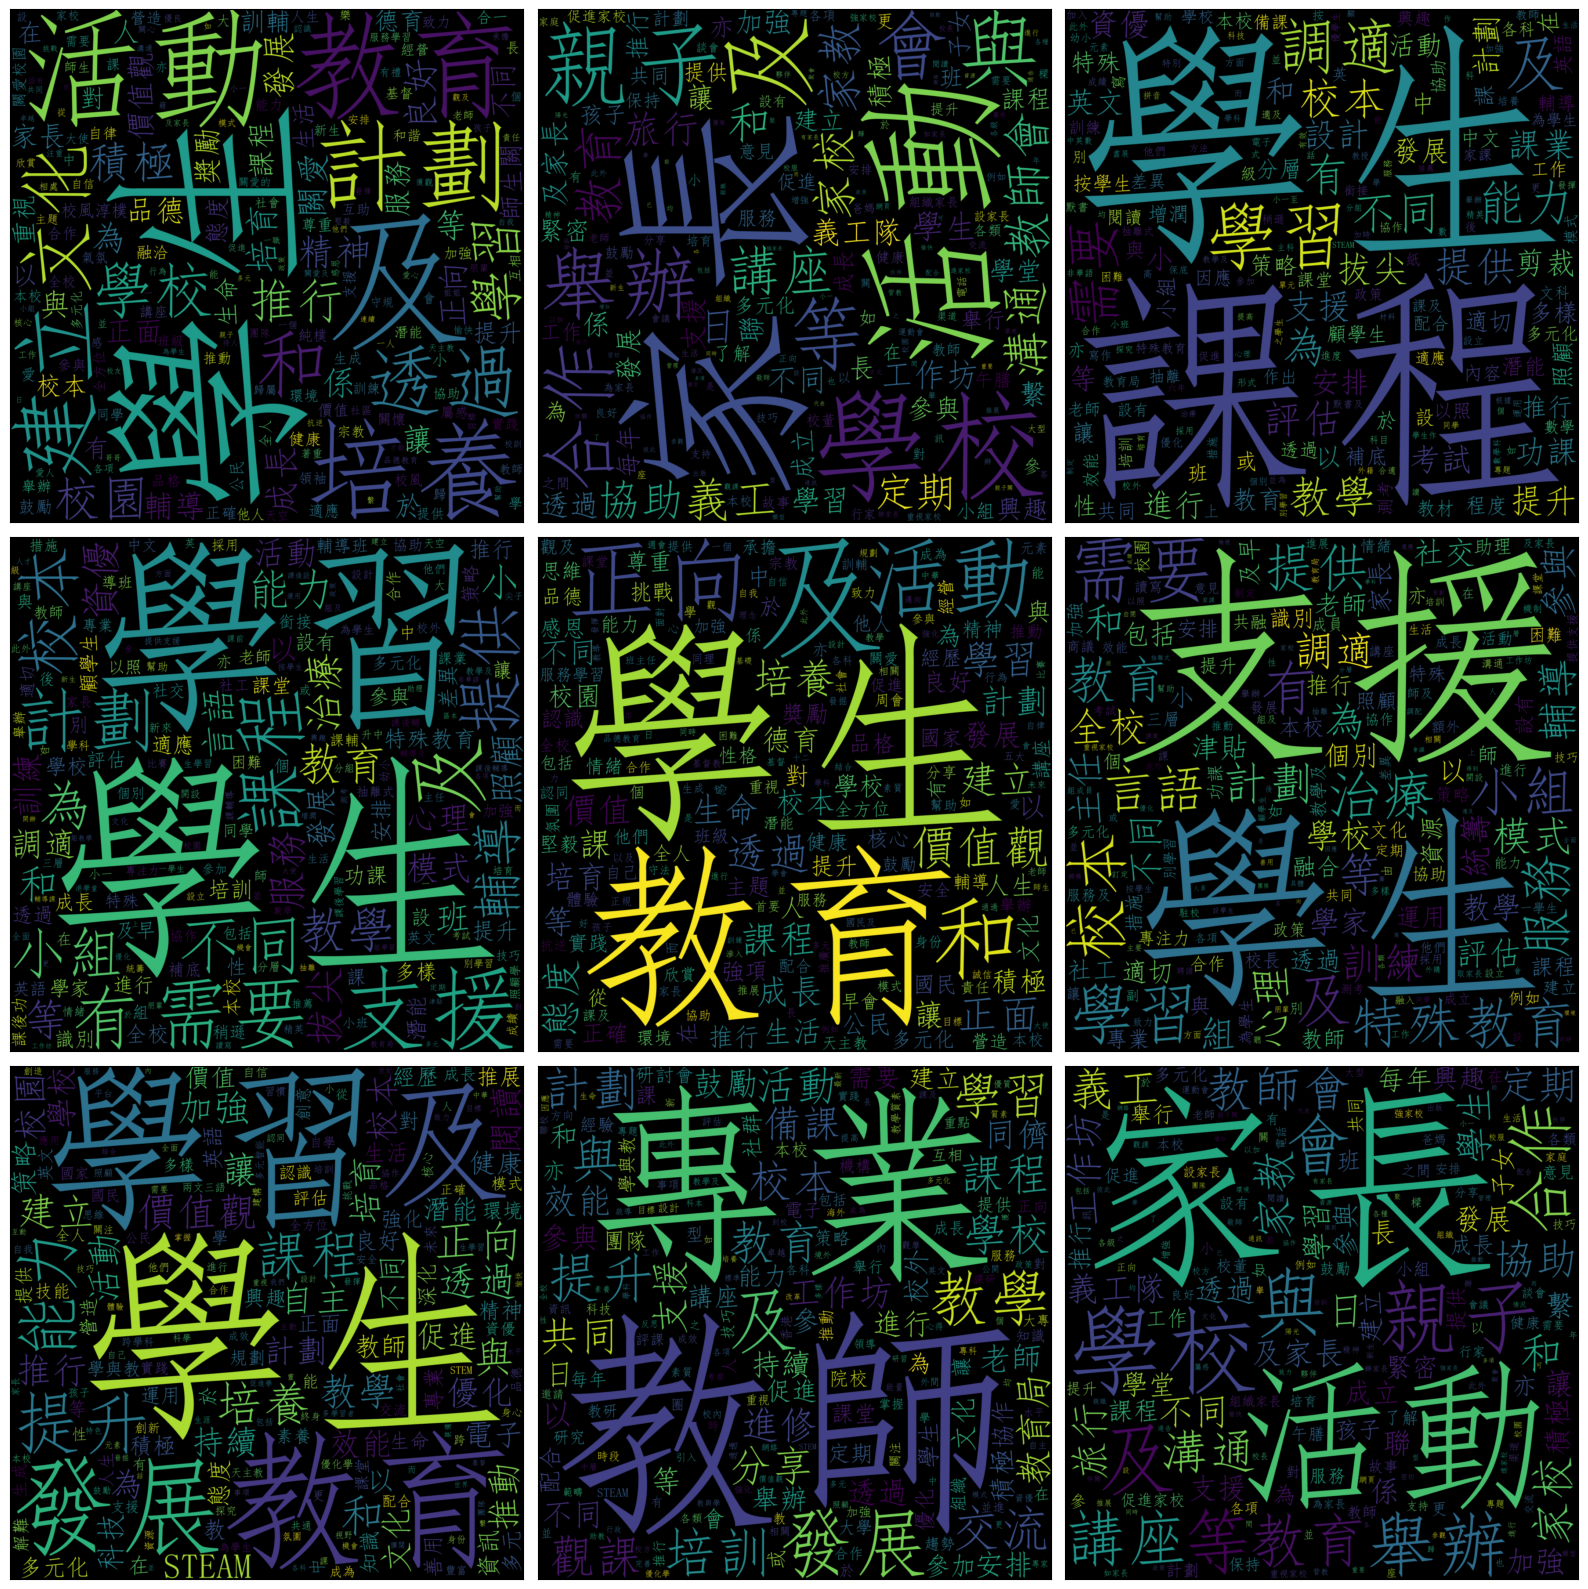

In [407]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hscse_school_ethos_splitArr = schools_datasets['hscse_school_ethos'].apply(jieba.lcut)
hscse_hsc_splitArr = schools_datasets['hscse_hsc'].apply(jieba.lcut)

scha_curriculum_tailoring_and_adaptation_splitArr = schools_datasets['scha_curriculum_tailoring_and_adaptation'].apply(jieba.lcut)
scha_cater_for_learner_diversity_splitArr = schools_datasets['scha_cater_for_learner_diversity'].apply(jieba.lcut)
scha_cultivation_of_positive_values_and_attitudes_splitArr = schools_datasets['scha_cultivation_of_positive_values_and_attitudes'].apply(jieba.lcut)
scha_integrated_education_splitArr = schools_datasets['scha_integrated_education'].apply(jieba.lcut)
	
fdev_school_dev_plan_splitArr = schools_datasets['fdev_school_dev_plan'].apply(jieba.lcut)	
fdev_teacher_pro_training_and_dev_splitArr = schools_datasets['fdev_teacher_pro_training_and_dev'].apply(jieba.lcut)	
		
words_list = [
    hscse_school_ethos_splitArr,
    hscse_hsc_splitArr,

    scha_curriculum_tailoring_and_adaptation_splitArr,
    scha_cater_for_learner_diversity_splitArr,
    scha_cultivation_of_positive_values_and_attitudes_splitArr,
    scha_integrated_education_splitArr,
        
    fdev_school_dev_plan_splitArr,
    fdev_teacher_pro_training_and_dev_splitArr,
    hscse_hsc_splitArr,
]

cloud_arr = []
font = r'C:\Windows\Fonts\simfang.ttf'
for (index, words_arr) in enumerate(words_list):
    words_data = [word for word_arr in words_arr for (index, word) in enumerate(word_arr) if index != 0 and word not in ['.', '，', ',', '。','br', '的'] and index != (len(word_arr)-1)]
    words = ''
    for word in words_data:
        words += word +' '
    wordcloud = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(words)
    # plt.imshow(wordcloud, interpolation='bilinear')
    wordcloud.to_file(f'words{index}.png') 
    # plt.axis("off")
    cloud_arr.append(wordcloud)

grid = np.random.rand(3, 4)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, wordcloud in zip(axs.flat, cloud_arr):
    ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()
plt.show()


In [408]:
district_and_school_type_1 = schools_datasets.groupby(['district', 'school_type_1']).size().reset_index(name='school_count')
fig = px.sunburst(district_and_school_type_1, path=['district', 'school_type_1'], values='school_count',
                  color='school_count')
fig.show()

In [409]:
district_and_school_type_1.head(5)

district school_type_1  school_count
0      中西區            官立             2
1      中西區            私立             4
2      中西區            資助            14
3     九龍城區            官立             4
4     九龍城區            直資             2

In [410]:
district_and_title_supervisor = schools_datasets.groupby(['title_supervisor','district']).size().reset_index(name='supervisor_count')
fig = px.sunburst(district_and_title_supervisor, path=['title_supervisor','district'], values='supervisor_count',
                  color='supervisor_count')
fig.show()

In [263]:
district_and_student_gender = schools_datasets.groupby(['district','student_gender']).size().reset_index(name='gender_count')

fig = px.sunburst(district_and_student_gender, path=['student_gender','district'], values='gender_count',
                  color='gender_count')
fig.show()

In [438]:
district_and_master = schools_datasets.groupby('district')['tsi_percent_of_master_doctorate_or_above'].sum().reset_index()
fig = px.pie(district_and_master, values='tsi_percent_of_master_doctorate_or_above', names='district', title='Number of teacher with master degree')
fig.show()

C:\Users\p243398\AppData\Local\Temp\ipykernel_16588\3991109020.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



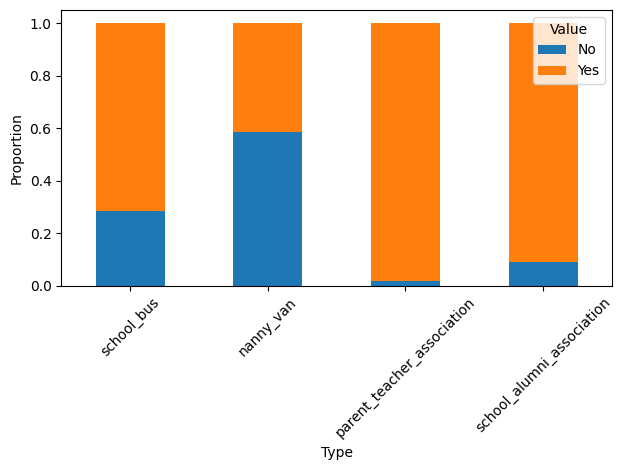

In [440]:
bus_and_association = primary_school_all[['school_bus','nanny_van','parent_teacher_association','school_alumni_association']].replace({'無':0,'有':1})
# 计算0和1的占比
proportions = bus_and_association.apply(lambda x: x.value_counts(normalize=True)).fillna(0)

# 绘制条形图
proportions.T.plot(kind='bar', stacked=True)
plt.title('')
plt.xlabel('Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Value', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [411]:
district_and_religion = schools_datasets.groupby(['district', 'religion']).size().reset_index(name='religion_count')

fig = px.pie(district_and_religion, values='religion_count', names='religion', title='Number of school with religion')
fig.show()

In [265]:
fig = px.treemap(district_and_religion, path=[px.Constant('Hong Kong'), 'religion','district' ], values='religion_count',
                  color='religion_count')
fig.show()

In [412]:
district_and_religion = schools_datasets.groupby(['commencement_of_operation_year', 'religion']).size().reset_index(name='commencement_of_operation_year_count')
fig = px.scatter(district_and_religion, x="commencement_of_operation_year", y="commencement_of_operation_year_count", size="commencement_of_operation_year_count", color="religion",
           hover_name="religion", log_x=True, size_max=40)
fig.show()


In [413]:
sorted_by_school_size = primary_school_all.sort_values(by=['school_size'], ascending=[False])

district_and_school_size_30 = sorted_by_school_size.groupby(['district', 'school_size']).size().reset_index(name='school_count')[:30]
fig1 = px.pie(district_and_school_size_30, values='school_count', names='district', title='Sorted by shcool size before 30')
fig1.show()

district_and_school_size_100 = primary_school_all.groupby(['district', 'school_size']).size().reset_index(name='school_count')[:100]
fig2 = px.pie(district_and_school_size_100, values='school_count', names='district', title='Sorted by shcool size before 100')
fig2.show()

district_and_school_size_300 = sorted_by_school_size.groupby(['district', 'school_size']).size().reset_index(name='school_count')[:300]
fig3 = px.pie(district_and_school_size_300, values='school_count', names='district', title='Sorted by shcool size before 300')
fig3.show()

# 3. Correlation

<Axes: >

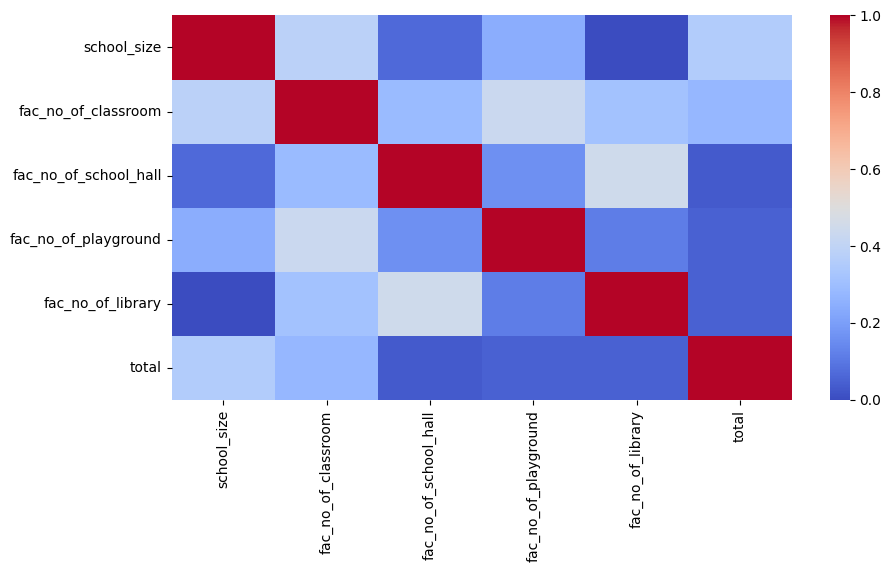

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

primary_school_all_fac = primary_school_all[['school_size','fac_no_of_classroom','fac_no_of_school_hall','fac_no_of_playground','fac_no_of_library'
,'total']]

plt.figure(figsize=(10,5))
sns.heatmap(primary_school_all_fac.corr(), cmap='coolwarm')

C:\Users\p243398\AppData\Local\Temp\ipykernel_16588\614360055.py:3: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Axes: >

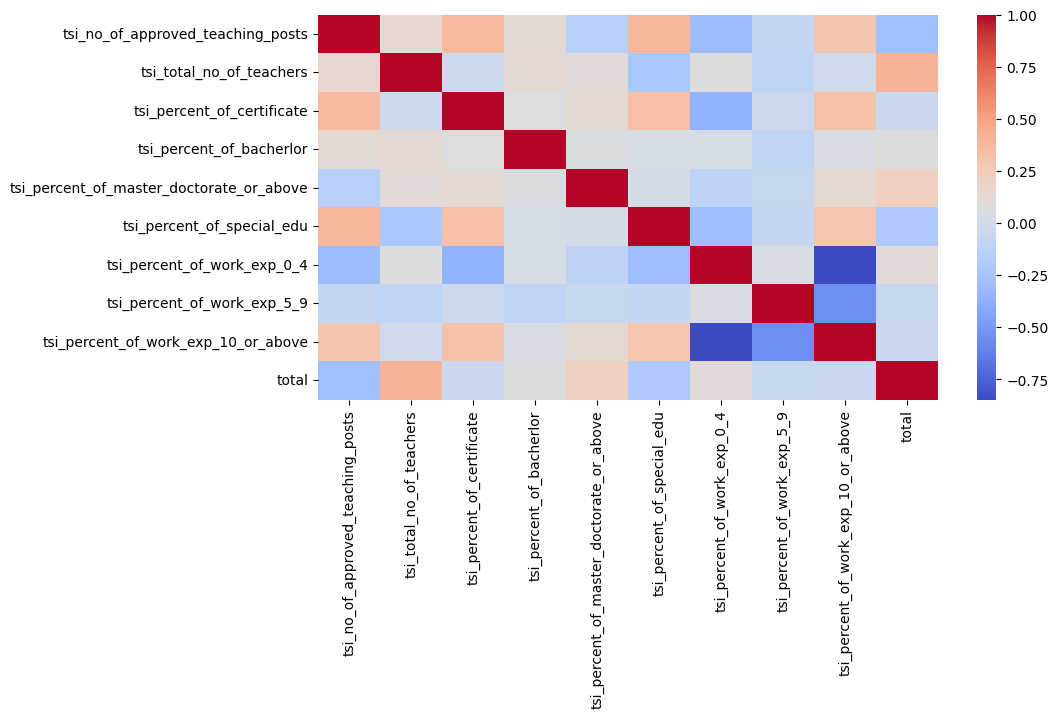

In [415]:
primary_school_all_teaching = primary_school_all[['tsi_no_of_approved_teaching_posts','tsi_total_no_of_teachers','tsi_percent_of_certificate','tsi_percent_of_bacherlor','tsi_percent_of_master_doctorate_or_above','tsi_percent_of_special_edu','tsi_percent_of_work_exp_0_4','tsi_percent_of_work_exp_5_9','tsi_percent_of_work_exp_10_or_above'
,'total']]
primary_school_all_teaching[primary_school_all_teaching.isna()].fillna(0)
primary_school_all_teaching = primary_school_all_teaching.replace('-',0)

plt.figure(figsize=(10,5))
sns.heatmap(primary_school_all_teaching.corr(), cmap='coolwarm')



<Axes: >

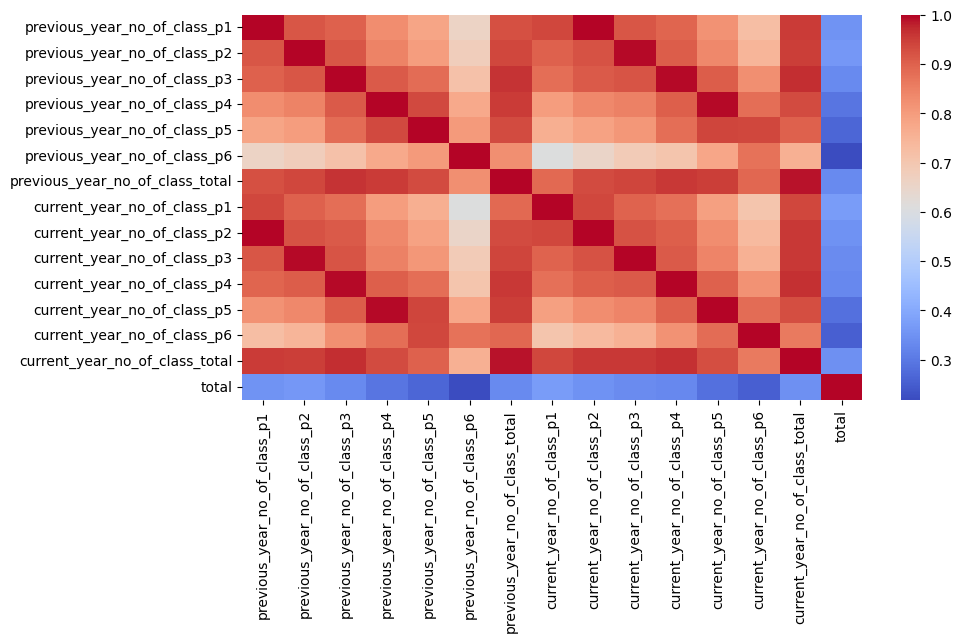

In [387]:


primary_school_all_class = primary_school_all[['previous_year_no_of_class_p1','previous_year_no_of_class_p2','previous_year_no_of_class_p3','previous_year_no_of_class_p4','previous_year_no_of_class_p5','previous_year_no_of_class_p6','previous_year_no_of_class_total','current_year_no_of_class_p1','current_year_no_of_class_p2','current_year_no_of_class_p3','current_year_no_of_class_p4','current_year_no_of_class_p5','current_year_no_of_class_p6','current_year_no_of_class_total'
,'total']]
primary_school_all_class[primary_school_all_class.isna()].fillna(0)
primary_school_all_class = primary_school_all_class.replace('-',0)

plt.figure(figsize=(10,5))
sns.heatmap(primary_school_all_class.corr(), cmap='coolwarm')



<Axes: >

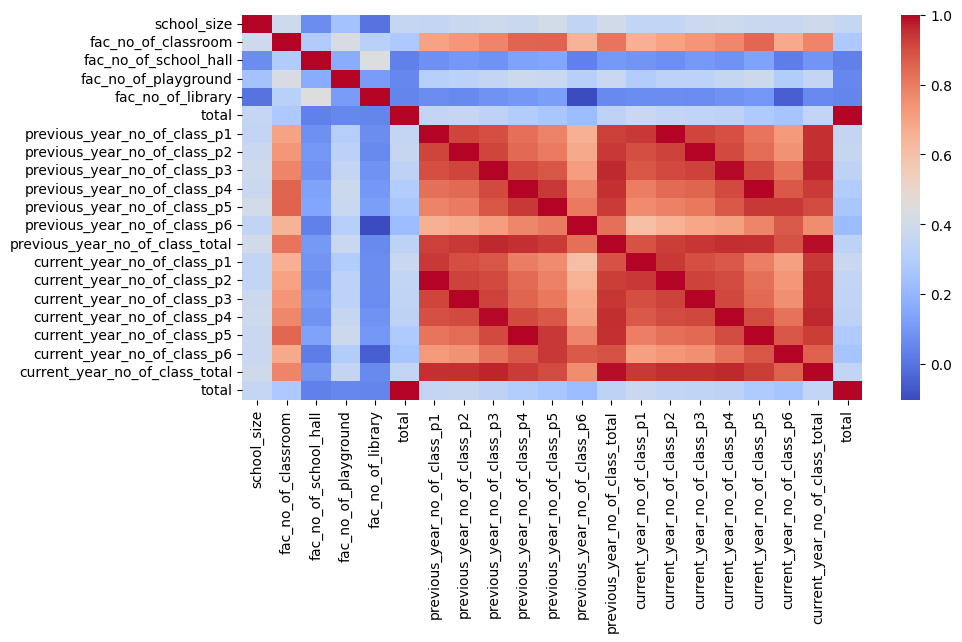

In [416]:
data = pd.concat([primary_school_all_fac,primary_school_all_class],axis=1)

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), cmap='coolwarm')

<Axes: >

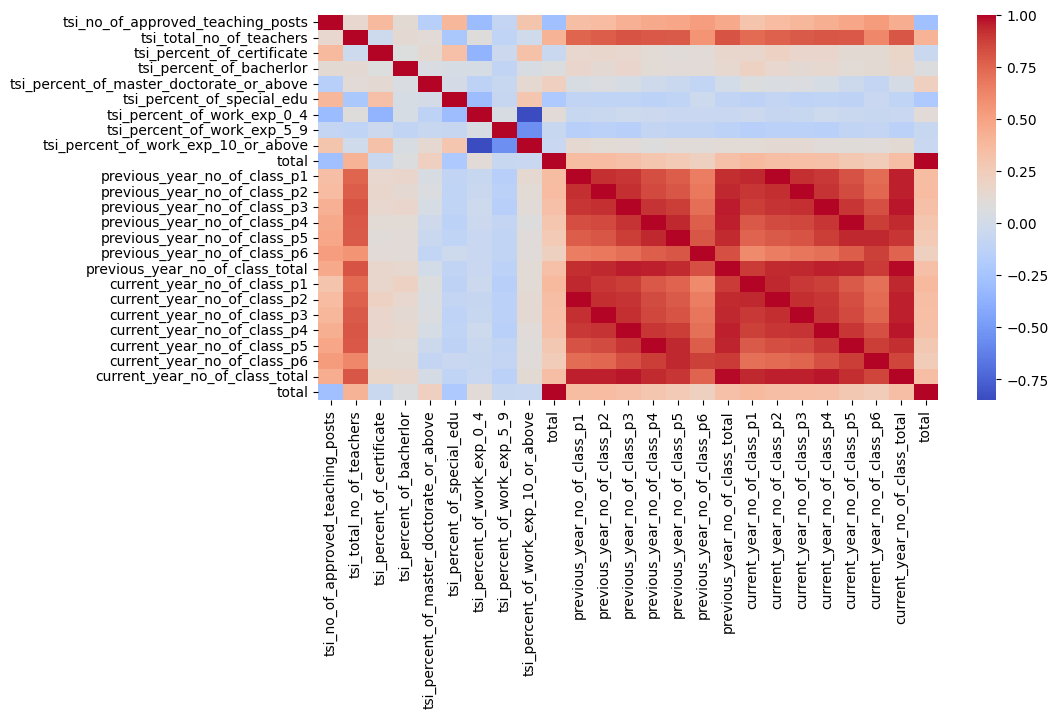

In [384]:
data = pd.concat([primary_school_all_teaching,primary_school_all_class],axis=1)

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), cmap='coolwarm')